# Filtr
![](img/filter.svg)

Nalezněte přenosovou funkci.

In [1]:
import sympy as sp
from IPython.display import display, Math
from copy import deepcopy

def tex(*arg):
    tmp = []
    for a in arg:
        if type(a) is str:
            
            format_hat = False
            format_bolt = False
            
            if a == '*':
                a = '\cdot'
            
            if a.startswith('__'):
                format_bolt = True
                a = a[2:]
            
            if a.startswith('^'):
                format_hat = True
                a = a[1:]
            
            if format_bolt:
                a = f'\\boldsymbol{{{a}}}'
            if format_hat:
                a = f'\\hat{{{a}}}'

        tmp.append(sp.latex(a))    
    display(Math(' '.join(tmp)))

In [2]:
R1 = R2 = R = sp.Symbol('R')
C1 = sp.Symbol('C_1')
C2 = sp.Symbol('C_2')

s = sp.Symbol('s')

G1 = 1/R1
G2 = 1/R2

B1 = s * C1
B2 = s * C2

M = sp.Matrix([
    [G1+B1, -G1, -B1],
    [-G1, G1+G2+B2, -G2],
    [-B1, -G2, G2+B1],
])

Iin = sp.Symbol('I_{IN}')

I = sp.Matrix([[Iin], [0], [0]])

U10 = sp.Symbol('U_{10}')
U20 = sp.Symbol('U_{20}')
U30 = sp.Symbol('U_{30}')

U = sp.Matrix([[U10], [U20], [U30]])

tex(M, '*', U, '=', I)

<IPython.core.display.Math object>

Získali jsme soustavu rovnic, která metodou MUN (metoda uzlových napětí) popisuje víše nakreslené schéma.

Nyní potřebujeme zjistit hodnoty uzlových napětí $U_{10}$ a $U_{30}$ z jejihž poměru bychom určili napěťový přenos $K_U(s)$.

K získání hodnot uzlových napětí můžeme využít __Cramerovo provaidlo__, které říká, že uzlové napětí záskáme jako podíl subdeterminantu ku hlavnímu determinantu, například: 
$$ U_{10} = \dfrac{\Delta_1}{\Delta} $$

Vzhledem k tomu, že však nepotřebujeme znát uzlová napětí a zajímá nás jen přenos, můžeme se počítání usnadnit:
$$ K_U(s) = \dfrac{U_{30}}{U_{10}} = \dfrac{ \dfrac{\Delta_3}{\Delta} }{ \dfrac{\Delta_1}{\Delta} } = \dfrac{\Delta_3}{\Delta_1} $$

In [3]:
M1 = deepcopy(M)
M1[:,0] = I
tex('M_1 =', M1)
det1 = sp.simplify(sp.det(M1))
tex('\Delta_1 =', det1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
M3 = deepcopy(M)
M3[:,2] = I
tex('M_1 =', M3)
det3 = sp.simplify(sp.det(M3))
tex('\Delta_3 =', det3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
K = sp.simplify(det3 / det1)
tex('K_U(s) =', K)

<IPython.core.display.Math object>

## Hledání nul a pólů

In [6]:
Z, P = str(K).replace('_', '').split('/')
Z = eval(Z)
P = eval(P)

tex('Z = ', Z)
tex('P = ', P)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
R_val = 10e3 # Ω
C1_val = 10e-9 # F
C2_val = 100e-9 # F

K = sp.simplify(K.subs(R1, R_val).subs(R2, R_val).subs(C1, C1_val).subs(C2, C2_val))

Z, P = str(K).replace('_', '').split('/')
Z = eval(Z)
P = eval(P)

tex('K_U(s) =', K)
tex('Z = ', Z, '= 0')
tex('P = ', P, '= 0')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

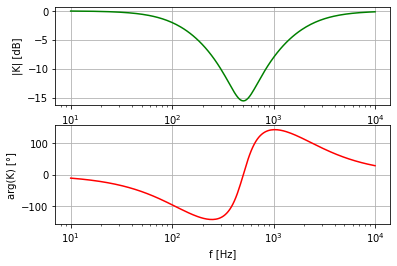

In [8]:
import numpy as np

k = []

freq = np.logspace(1,4, 200)
for f in freq:
    s = 2*np.pi*f*1j
    k.append(eval(str(K)))

k = np.array(k)
mod = 20 * np.log10(np.abs(k))
arg = np.angle(k) * 180

from matplotlib import pyplot as plt

plt.subplot(211)
plt.semilogx(freq, mod, 'g')
plt.grid(True)
plt.xlabel('f [Hz]')
plt.ylabel('|K| [dB]')

plt.subplot(212)
plt.semilogx(freq, arg, 'r')
plt.grid(True)
plt.xlabel('f [Hz]')
plt.ylabel('arg(K) [°]')

plt.show()

In [9]:
def get_freq(s_list):
    for s in s_list:
        #f = s / (1j*2*np.pi)
        print(s)

get_freq(sp.solve(Z))
get_freq(sp.solve(P))

-1000.0 - 3000.0*I
-1000.0 + 3000.0*I
-11099.0195135928
-900.980486407215
